<a href="https://colab.research.google.com/github/MERTZGZ/Visea-Project/blob/main/Visea-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Thu Apr  6 04:07:58 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Ji3nDxmBDENUNFJOzpXZ")
project = rf.workspace("mertzgz-gmail-com").project("segmentation-xcuro")
dataset = project.version(2).download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.28, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to segmentation-2 in yolov8:: 100%|██████████| 1002/1002 [00:00<00:00, 4076.50it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=100 

## Inference with Custom Model

In [ ]:
model = YOLO(f'{HOME}/best.pt')
results = model.predict( conf=0.51, source='/content/test/test_17.jpg', boxes=True, retina_masks=True, save=True)

Ultralytics YOLOv8.0.28 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780374 parameters, 0 gradients, 42.4 GFLOPs

image 1/1 /content/test/test_17.jpg: 224x640 3 arabas, 11.3ms
Speed: 0.3ms pre-process, 11.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict6


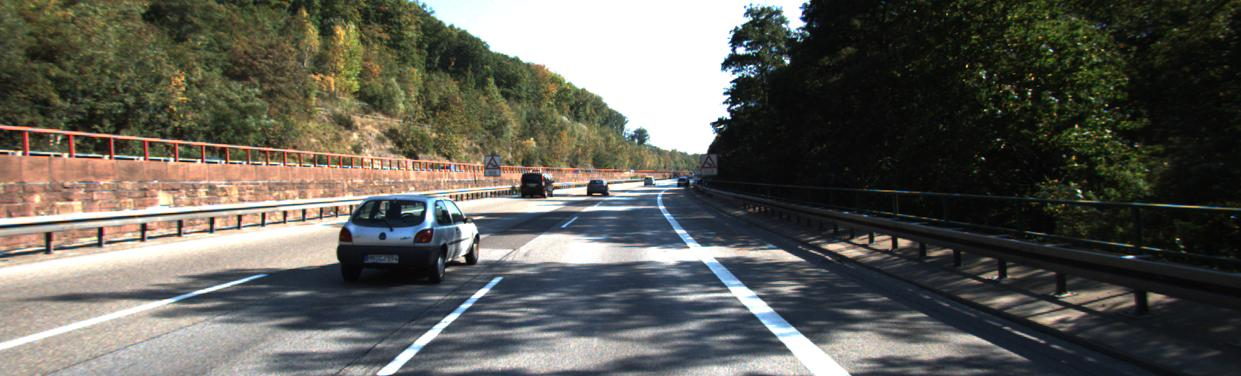

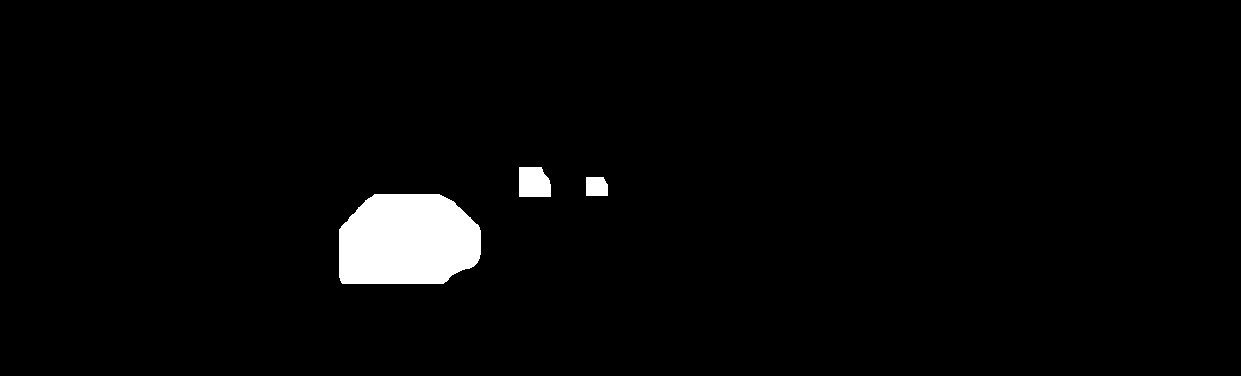

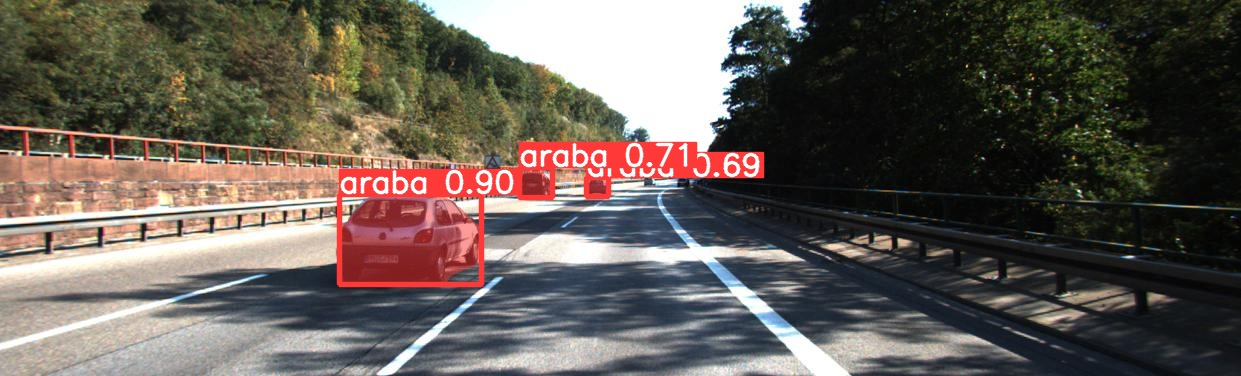

In [ ]:
import cv2
import numpy as np
from IPython.display import display, Image

masks = results[0].masks.masks.cpu().numpy().astype(np.uint8)

combined_mask = np.zeros_like(masks[0])
for mask in masks:
    combined_mask = cv2.add(combined_mask, mask)
combined_mask *= 255
cv2.imwrite('/content/FINAL/combined_mask.jpg', combined_mask)

display(Image(filename=f'{HOME}/test/test_17.jpg', width=400))
display(Image(filename='/content/FINAL/combined_mask.jpg', width=400))
display(Image(filename=f'{HOME}/datasets/runs/segment/predict6/test_17.jpg', width=400))

